In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img

#### Dominant colors in images

Let us try to use clustering on real world problems. Here, we will analyze images to determine dominant colors.

Any image consists of pixels, each pixel represents a dot in the image. A pixel consists of three values - each value is a number between 0-255, representing the amount of its red, green and blue components. The combination of these forms the actual color of the pixel. 

To find the dominant colors, we will perform k-means clustering, with its RGB components. One important use of k-means clustering on images is to find the dominant colors in an image. Various colors typically belong to different features. K-means clustering can be used to cluster them into groups, which can then be identified into various features.

There are broadly three steps to find the dominant colors in an image:

- Extract RGB values into three lists.
- Perform k-means clustering on scaled RGB values.
- Display the colors of cluster centers.

There are two additional methods of matplotlib, which are a part of the image class. 
1. To extract RGB values, we use the imread() function of the image class of matplotlib.
2. The second method is the imshow method which would display colors of the cluster centers once you perform k-means clustering on the RGB values.

In [2]:
# Import image class of matplotlib
import matplotlib.image as img

In [3]:
# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
#print(batman_image)

In [4]:
print(batman_image.shape)

(255, 403, 3)


#### Convert image to RGB matrix

The first step in the process is to convert the image to pixels using the imread method of the image class. Notice that the output of this function is a MxNx3 matrix, where M and N are the dimensions of the image. 

In this analysis, we are going to collectively look at all pixels, and their position would not matter, hence, we will just extract all RGB values and store them in their corresponding lists.

In [5]:
r = []
g = []
b = []

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [6]:
#print(r)

#### Data frame with RGB values

Once the lists are created, we store them in a Pandas data frame.

In [7]:
batman_df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
batman_df.head()

,red,blue,green
0,38,25,22
1,42,25,23
2,43,23,21
3,51,28,25
4,54,32,29


In [8]:
# Import the whiten function
from scipy.cluster.vq import whiten

The RGB values are stored in a data frame, batman_df. Now, The RGB values will be standardized by using the whiten() function, and will be stored in columns, scaled_red, scaled_blue and scaled_green.

In [9]:
batman_df["scaled_red"] = whiten(batman_df["red"])
batman_df["scaled_blue"] = whiten(batman_df["blue"])
batman_df["scaled_green"] = whiten(batman_df["green"])
batman_df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,38,25,22,0.492576,0.293374,0.295245
1,42,25,23,0.544426,0.293374,0.308665
2,43,23,21,0.557389,0.269904,0.281824
3,51,28,25,0.661089,0.328579,0.335505
4,54,32,29,0.699976,0.375519,0.389186


#### Elbow plot

Once we scale the RGB values of the list of pixels, we create the elbow plot to see how many dominant colors are present in the image.

In [10]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

In [11]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[["scaled_red", "scaled_blue", "scaled_green"]], i )
    distortions.append(distortion)

In [12]:
# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({"num_clusters":num_clusters, "distortions": distortions})
elbow_plot

,num_clusters,distortions
0,1,1.662359
1,2,0.893974
2,3,0.403630
3,4,0.303922
4,5,0.251389
5,6,0.221558


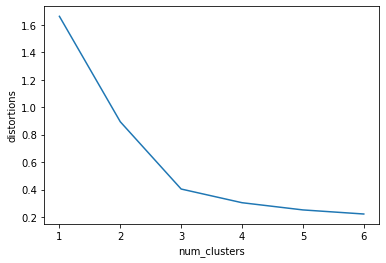

In [13]:
# Create a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

Notice that the elbow plot indicates 3 clusters.

In [14]:
cluster_centers, dist = kmeans(batman_df[['scaled_red', 'scaled_blue','scaled_green']], 3)

#### Find dominant colors

The cluster centers obtained are standardized RGB values. Recall that a standardized value of a variable is its actual value divided by the standard deviation. We would display the colors through the imshow method, which takes RGB values that have been scaled to the range of 0 to 1. 

To do so, we need to multiply the standardized values of the cluster centers with their corresponding standard deviations. We saw earlier that actual RGB values take the maximum value of 255, hence we divide it by 255 to get a scaled value in the range of 0-1.

In [15]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))


### Display dominant colors

Once we have the colors with their RGB values, the imshow method is used to display them. 

Note that you need to provide the colors variable encapsulated as a list, as the imshow method expects a MxNx3 matrix to display a 2D grid of colors. By doing this, we are providing a 1xNx3 matrix, which tells imshow method to display only one row of colors, where N is the number of clusters. 

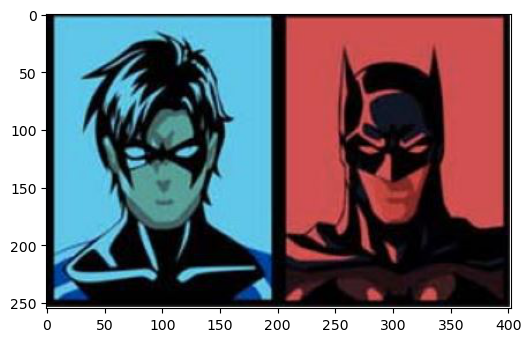

In [16]:
## Displaying the image
plt.figure(dpi=100)
plt.imshow(batman_image)

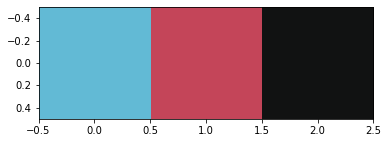

In [17]:
# Display colors of cluster centers
plt.imshow([colors])
plt.show()

Here are the 3 dominant colors, which supports our preliminary observations.

In [18]:
h,w,c = batman_image.shape

In [19]:
## 3D --->> 2D

image_as_array2D = batman_image.reshape(h*w, c)
image_as_array2D

array([[ 38,  22,  25],
       [ 42,  23,  25],
       [ 43,  21,  23],
       ...,
       [255, 255, 255],
       [245, 245, 245],
       [255, 255, 255]], dtype=uint8)

In [20]:
from sklearn.cluster import KMeans

In [38]:
model = KMeans(n_clusters=6)

In [39]:
labels = model.fit_predict(image_as_array2D)
labels

array([1, 1, 1, ..., 5, 5, 5])

In [40]:
rgb_code = np.round(model.cluster_centers_, decimals=0).astype(int)

In [41]:
rgb_code

array([[202,  80,  81],
       [ 10,   7,  11],
       [ 98, 197, 229],
       [ 66,  46,  53],
       [ 73, 128, 139],
       [254, 254, 254]])

In [42]:
labels

array([1, 1, 1, ..., 5, 5, 5])

In [43]:
rgb_code[labels]

array([[ 10,   7,  11],
       [ 10,   7,  11],
       [ 10,   7,  11],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]])

In [44]:
quantized_image = np.reshape(rgb_code[labels],(h,w,c))
quantized_image

array([[[ 10,   7,  11],
        [ 10,   7,  11],
        [ 10,   7,  11],
        ...,
        [ 66,  46,  53],
        [ 66,  46,  53],
        [254, 254, 254]],

       [[ 10,   7,  11],
        [ 10,   7,  11],
        [ 10,   7,  11],
        ...,
        [ 10,   7,  11],
        [ 66,  46,  53],
        [254, 254, 254]],

       [[ 10,   7,  11],
        [ 10,   7,  11],
        [ 10,   7,  11],
        ...,
        [ 10,   7,  11],
        [ 10,   7,  11],
        [254, 254, 254]],

       ...,

       [[ 10,   7,  11],
        [ 10,   7,  11],
        [ 10,   7,  11],
        ...,
        [ 10,   7,  11],
        [ 66,  46,  53],
        [254, 254, 254]],

       [[ 10,   7,  11],
        [ 10,   7,  11],
        [ 10,   7,  11],
        ...,
        [ 10,   7,  11],
        [ 66,  46,  53],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

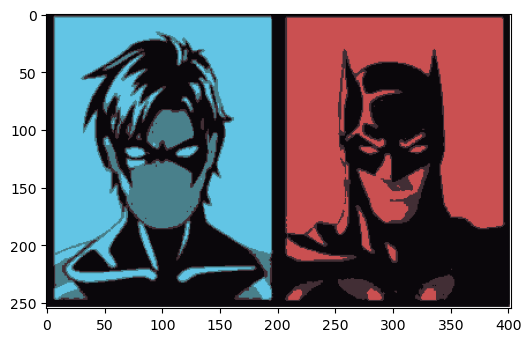

In [45]:
## Displaying the image
plt.figure(dpi=100)
plt.imshow(quantized_image)
plt.savefig("quantized Batman.jpg")